# 1 | What is Reinforcement Learning?

**Machine Learning (ML)** often has a hidden dimension: time.
Time often make your predictions wrong long term.
**Reinforcement Learning (RL)** is a subfield of ML that includes time into the learning process.
Such characteristic makes it more representative of **Artificial Intelligence (AI)**.

## Supervised Learning

**Supervised Learning (SL)** is the most studied subfield of ML.
It consists in automatically building a function mapping some input to some output given examples.
Examples of SL include:

- **Text classification**
- **Image classification** and **object location**
- **Regression problems** (predict tomorrow weather from values by weather sensors)
- **Sentiment analysis**

Notice that _'supervised'_ implies the presence of labels on the data (ground truth).

## Unsupervised Learning

The second complementary subfield if ML is **Unsupervised Learning (UL)**.
Notice that _'unsupervised'_ implies the absence of any labels on data.
UL aims at identifying hidden structures in the data (clustering).
Advanced approaches for UL include **Generative Adversarial Networks (GANs)**.
GANs consist in two competing neural networks that learn to identifying subtle patterns over time.
(The first network aims at generating fake data, and the second at discriminating real data from fake.)

## Reinforcement Learning

RL lies somewhere between SL and UL: we don't have labels but a heuristic for them.
It uses methods from SL such as **deep neural networks** to approximate functions, or **stochastic gradient descent**, and **backpropagation**, to learn data representation, but applies them in a different way.

In order to compare RL with SL and UL, we introduce some practical concepts.

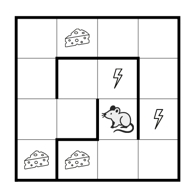

* **Agent:** an entity in an _environment_ taking _actions_; ie: a robot mouse
* **Environment:** the context in which the _agent_ takes _actions_; i.e.: a maze with food and threats
* **Action:** a specific move that the _agent_ can make within the _environment_; i.e.: turn, move, wait
* **Reward:** objective that the _agent_ wants to maximise by taking _actions_ in the _environment_; i.e.: eating food (positive reward, to seek), being threatened (negarive reward, to avoid if possible), or doing nothing (neutral reward)

Notice that the reward is not like having data labelled but is also better than not having any label at all.

## Complications in RL

Notice that a stubborn agent indulging on inefficient actions keeps receiving negative reward.
A reward is not explicit like a label, and it might suggest that it is not possible to achieve positive outcomes.
In ML terms, this is described as having non-**independent and identically distributed (iid)** data.
Having iid data is a non-negotiable condition for success for most SL methods.

Also notice that agents not have to explore their environment.
Taking actions in a different order might produce different outcomes.
Lack of exploration might prevent achieving better outcome (as said above).
Too much exploration might dilute reward or cause the agent to forget something, also leading to suboptimal outcomes.

Moreover, positive reward might be perceived much after taking an action (i.e.: capturing a piece in chess).
Discerning such causalities is tricky but crucial for successful usage.
**Causal Reinforcement Learning** might be the key to optimal outcomes.

## RL Formalisms

Lack of labels in a context doesn't make SL good or bad, just non-applicable.
RL is a creative way to overcome such situations.

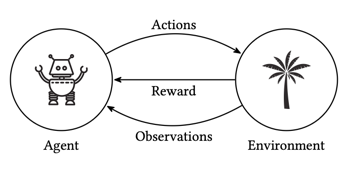

The two main entities in RL are:

* **Agent:** entity interacting with the _environment_ by making _observations_, executing _actions_, and getting _reward_.
* **Environment:** everything outside the _agent_ in the simulated universe.

Notice that the communication with the agent is limited to _reward_ (obtained from the environment), _actions_ (executed by the agent towards the environment) and _observations_ (some extra information besides the reward recevied from the environment).
Specifically:

* **Observations:** the _agents'_ second information channel after _reward_; a separate information channel is needed for convenience that might contain values derived from _reward_ (i.e.: the score in a video game screenshot) but shouldn't replace the _reward_; an _observation_ is not the _enviroment_'s current _state_: the _state_ is internal to the environment and might be too large and impractical to share it with the _agent_.
* **Actions:** things that the _agent_ can do in the _environment_; actions can be discrete (finite
set of mutually exclusive things an agent can do, i.e.: `move left`, `move right`) or continuous (have some value attached to them, typically in [0, 1], i.e.: `accellerate(0.8)`).
* **Reward:** a scalar value (either positive, negative or zero; small or large) obtained periodically from the _environment_; it tells the _agent_ how well it has performed so far (heuristic on success) hence the term reinforcement. Reward is _local_ (depends on the specific actions taken up to that point).

## The Theoretical Foundations of RL

This section introduces the mathematical representation and notation of the RL formalisms.

### Markov Decision Processes

**Markov Decision Processes (MDPs)** is a key concept in RL widely used in computer science and other engineering as well.
MDPs are like **Markov Reward Processes (MRPs)** extended with support to _actions_.
MRPs are like **Markov Processes (MPs)** extended with support to _reward_.

#### Markov Processes (MPs)

The MP or Markov Chain is a _system_ that can only be observed (no interaction).
Each observation reflects the current _state_ of the system.
The system commute state according to some generally unknown laws of dynamics.
The set of all the possible states of a system is called _state space_.
For practical reasons, the _state space_ must be finite but possibly very large.
A _chain_ is a sequence of observations (current states), hence the name Markov chains.

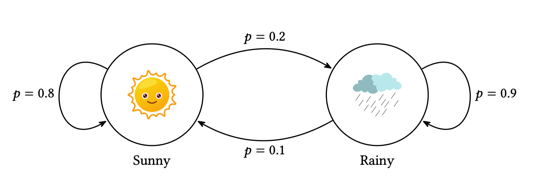

For example if the _observable system_ is a city's weather, its _state space_ is `(sunny, rainy)` and `[sunny, sunny, rainy, sunny, ...]` is a _chain_, also known as _history_.
Such system is called MP if it fulfills the **Markov property**: any future state depends only on the current state.
This implies that each state is distinguishable from others and unique.
In other words, one state is sufficient to model the system's future dynamics (and not the whole history or the last `N` states).

In our example, the Markov property implies that to predict whether a sunny day follows a rainy one, we only need to consider the current state.
We don't need to know, for instance, how many rainy days there have been in a row; no further history is required (even though common sense would advise otherwise).

We can the model more complex by extending the state space to capture more dependencies to make predictions more accurate.
For instance include the season in the state to capture the likelihood of rainy days during summer and winter.
The state space then becomes `[sunny+summer, sunny+winter, rainy+summer, rainy+winter]`.

Because of the Markov property, transition probabilities are captured by a **transition matrix**.
It's a square matrix of rank `N` (or `NxN`) where `N` is the size of the state space or the number of states in the model.
Each cell of the matrix in row _i_ and column _j_ contain the probability of the system to transition from state _i_ to _j_.

|       | Sunny | Rainy |
|:-----:|:-----:|:-----:|
| Sunny |  0.8  |  0.2  |
| Rainy |  0.1  |  0.9  |

(In a sunny day, there is respectively 80% and 20% probability to have a sunny or rainy day.
In a rainy day, there is respectively 10% and 90% probability to have a sunny or rainy day.)

The formal definition of MP is `MP(S,T)` where **S** is a state space and **T** a transition matrix on such states which defines the system dynamics.
A state diagram (a finite state machine) annotated with transition probabilities is a valid visual representation of an MP (see the opening picture of this section).
Notice that if the probability of a transition is 0, we don't draw that edge (there is no way to go from one state to another).

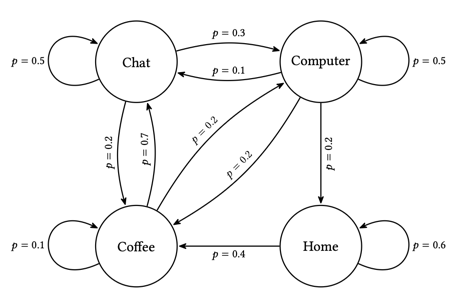

This is another example, called the _Office Worker_ (like Scott Adams' Dilbert).
In this case, **S** is `(Home, Coffee, Chat, Computer)` and **T** is:

|          | Home | Coffee | Chat | Computer |
|:--------:|:----:|:------:|:----:|:--------:|
|   Home   | 60%  |  40%   |  -   |    -     |
|  Coffee  |  -   |  10%   | 70%  |   20%    |
|   Chat   |  -   |  20%   | 50%  |   30%    |
| Computer | 20%  |  20%   | 10%  |   50%    |

The meaning of the states is:

- **Home:** Dilbert is not at the office
- **Coffee:** Dilbert is drinking coffee at the office
- **Chat:** Dilbert is discussing something with colleagues at the office
- **Computer:** Dilbert is working on his computer at the office

We assume Dilbert usually starts from the `Home` state, then always has a Coffee without exception.
Also notice that each workday ends with Dilbert going `Home` from the `Computer` state.

Knowing the exact transition matrix is a rare luxury.
A more likely real-world scenario consists in just knowing a few sequences of system's state observations, also called **episodes**:

- Home | Coffee | Coffee | Chat | Chat | Coffee | Computer | Computer | Home
- Computer | Computer | Chat | Chat | Coffee | Computer | Computer | Computer
- Home | Home | Coffee | Chat | Computer | Coffee | Coffee

It's always possible to estimate a transition matrix from episodes: count all the transitions from every state and normalise them to a sum of 1.
The more episodes we have the closer our estimation will be to the true underlying model.

In [8]:
states = ['Home', 'Coffee', 'Chat', 'Computer']
episodes = [
    ['Home', 'Coffee', 'Coffee', 'Chat', 'Chat', 'Coffee', 'Computer', 'Computer', 'Home'],
    ['Computer', 'Computer', 'Chat', 'Chat', 'Coffee', 'Computer', 'Computer', 'Computer'],
    ['Home', 'Home', 'Coffee', 'Chat', 'Computer', 'Coffee', 'Coffee'],
]

size = len(states)
matrix = [[0] * size for _ in range(size)]
for episode in episodes:
    indices = [states.index(s) for s in episode]
    for i, j in zip(indices[:-1], indices[1:]):
        matrix[i][j] += 1

for row in matrix:
    n = sum(row)
    if n > 0:
        row[:] = [f/sum(row) for f in row]

for row in matrix:
    print(", ".join(f"{100 * v:5.2f}%" for v in row))


33.33%, 66.67%,  0.00%,  0.00%
 0.00%, 33.33%, 33.33%, 33.33%
 0.00%, 40.00%, 40.00%, 20.00%
14.29%, 14.29%, 14.29%, 57.14%


|          |  Home  | Coffee |  Chat  | Computer |
|:--------:|:------:|:------:|:------:|:--------:|
|   Home   | 33.33% | 66.67% |   -    |    -     |
|  Coffee  |   -    | 33.33% | 33.33% |  33.33%  |
|   Chat   |   -    | 37.50% | 25.00% |  37.50%  |
| Computer | 14.29% | 35.71% | 21.43% |  28.57%  |

Notice that the Markov property implies **stationarity**: the transition distribution doesn't change over time.
Non-stationarity implies a hidden factor that influencing the system dynamics, not included in the observations.
Non-stationarity contradicts the Markov property which requires the same underlying probability distribution for any state regardless of the transition history.

Don't confuse actual transitions observed in an episode with the underlying distribution in the transition matrix.
Concrete episodes are random walks on the model, so they can differ from episode to episode.
Yet the probability of a concrete transition to be sampled remains the same.
If not, the Markov chain formalism is non-applicable.

#### Markov Reward Processes (MRPs)

MRPs are MPs with a discount factor 𝛾 and transitions decorated with an extra scalar to model reward.
Introducing the reward is easy as it complement the existing probabilities that instead capture the dynamics of the system.

As mentioned, rewards can be positive or negative, large or small and can be modelled in many ways.
One method consists in expressing the state space as a set of `(state,reward)` pairs.
In this case, reward is acquired by entering a given state independently of the originating state.

Another option is decorating each transition with a reward so that


Reward can be modelled in many ways: either by decorating a transition or a state.
In the first instance, the reward is obtained by transitioning from state _i_ to state _j_.
Reward is tracked by noting down the reward by transitioning from state _i_ to state _j_ into the cell at row _i_ and column _j_ of a `NxN` square matrix similar to the transition matrix.
In the latter case, it is acquired by entering a given state _s_ independently of the originating state.
In this case the reward is tracked by extending each state in the state space with a pair `(state,reward)`.
Decorating transitions is more expressive: you can assign the same reward for all paths to a state, or different rewards for different paths.
Decorating states, on the other hand, lacks such flexibility.

$$G_t = R_{t+1} + \gamma \cdot R_{t+2}\ +\ ...\ = \sum^{\infty}_{k=0} \gamma^k \cdot R_{t+k+1}$$

In some cases, this representation is
redundant and can be simplified. For example, if a reward is given for reaching the state regardless of the
origin state, we can keep only (state, reward) pairs, which is a more compact representation. However, this is
applicable only if the reward value depends solely on the target state, which is not always the case.
The second thing we’re adding to the model is the discount factor 𝛾 (Greek letter “gamma”), which is a single
number from 0 to 1 (inclusive). The meaning of this will be explained after the extra characteristics of our
MRP have been defined.
As you will remember, we observe a chain of state transitions in an MP. This is still the case for a MRP, but
for every transition, we have our extra quantity — reward. So now, all our observations have a reward value
attached to every transition of the system.
For every episode, we define return at the time 𝑡 as 𝐺𝑡: